In [77]:
# python 3.5
# tensorflow 0.12

In [94]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from utility import movingAverage
%matplotlib inline

## gym initilize

In [95]:
env = gym.make('FrozenLake-v0')

[2017-01-03 16:04:15,581] Making new env: FrozenLake-v0


In [116]:
learning_rate = 0.1
alpha = 0.99
num_episodes = 10000
epsilon = 0.1

In [97]:
tf.reset_default_graph()

In [98]:
input1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
w = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(input1, w)
predict = tf.argmax(Qout,1)

In [99]:
nextQ = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
train_op = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [100]:
init_op = tf.global_variables_initializer()

In [120]:
reward_log = []
score_log = []

with tf.Session() as sess:
    sess.run(init_op)
    
    for epoch in tqdm(range(num_episodes)):
        s = env.reset()   # episode initilize
        rAll = 0
    
        action_in_episode = 0
        while action_in_episode < 99:
            action_in_episode += 1

            # choose action & add noise
            predict_action, current_Q = sess.run([predict, Qout], feed_dict={input1:np.identity(16)[s:s+1]}) 
            
            if np.random.rand(1) < epsilon:
                a = env.action_space.sample()           
            else:
                a = predict_action[0]            

            # get new state
            s1, reward, done, _ = env.step(a)

            # udpate Q value
            next_Q = sess.run(Qout, feed_dict={input1:np.identity(16)[s1:s1+1]})
            
            max_nextQ = np.max(next_Q)
            targetQ = current_Q
            targetQ[0, a] = reward + alpha * max_nextQ
            
            sess.run(train_op, feed_dict={input1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += reward
            s = s1

            # check done
            if done == True:
                epsilon = 1./((0.1*epoch+50) + 10)
                break
        reward_log.append(rAll)
        score_log.append(action_in_episode)

100%|██████████| 10000/10000 [07:44<00:00, 21.53it/s]


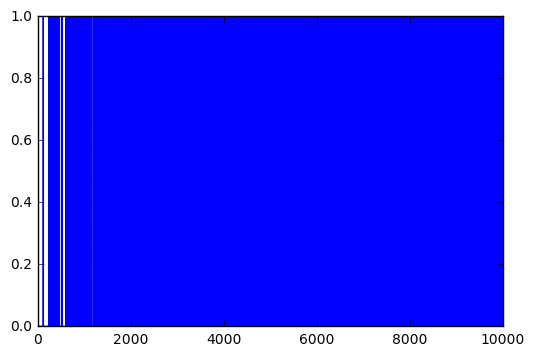

In [121]:
plt.plot(reward_log)

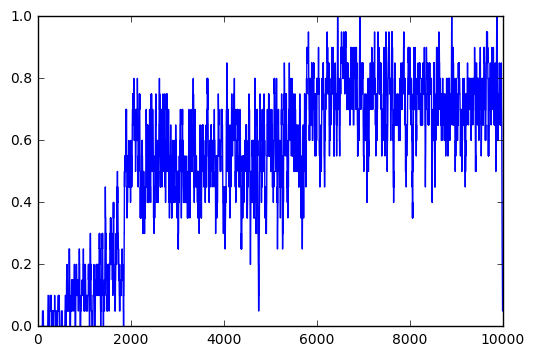

In [122]:
reward_log_mean = movingAverage(reward_log, 20)
plt.plot(reward_log_mean)

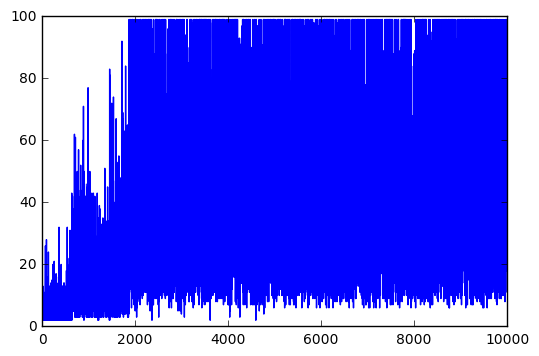

In [124]:
plt.plot(score_log)